In [14]:
# %matplotlib tk
%matplotlib inline
import os
import re
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar
from scipy.fft import rfft, rfftfreq
from scipy.io.wavfile import write
from scipy.fft import irfft
import scipy.signal


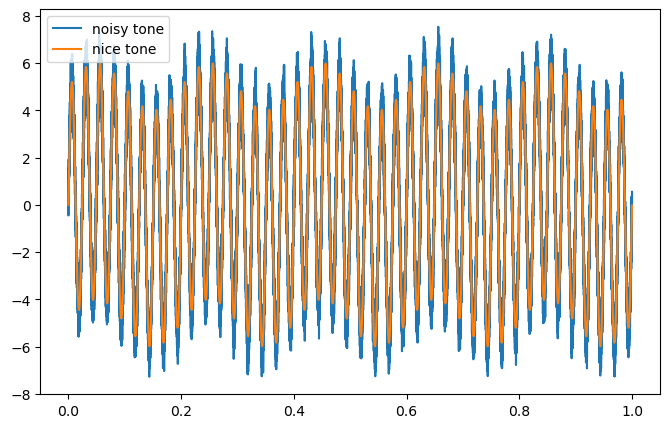

In [2]:
def generate_sine_wave(freq1, freq2, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = 5*np.sin(2 * np.pi * x * freq1 ) + np.sin(2 * np.pi * x * freq2)
    return x, y

SAMPLE_RATE = 44100  # Hertz 44100
DURATION = 1  # Seconds

x, nice_tone = generate_sine_wave(40, 5, SAMPLE_RATE, DURATION) 
noise_tone = nice_tone + np.random.normal(0,.5,SAMPLE_RATE * DURATION)/1

f, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, noise_tone, label= 'noisy tone')
ax.plot(x, nice_tone, label= 'nice tone')
plt.legend()
plt.show()

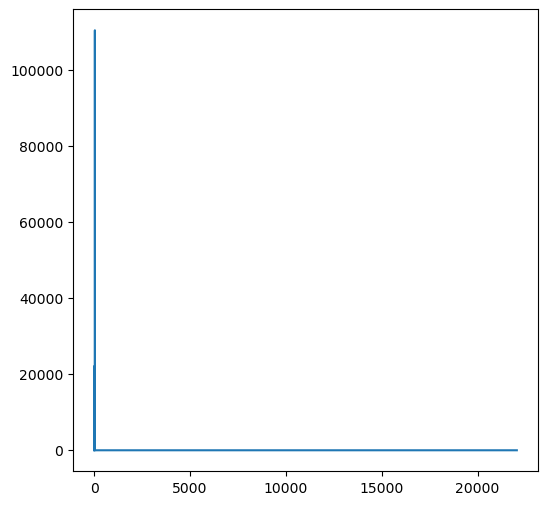

In [3]:
N = SAMPLE_RATE * DURATION

yf = rfft(noise_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

q_of_max_values = 2
max_indexes = np.argpartition(np.abs(yf), -q_of_max_values)[-q_of_max_values:]
indexes = np.ones(len(yf), bool)
indexes[max_indexes] = 0
yf[indexes] = 0

f, ax = plt.subplots(figsize=(6, 6))
ax.plot(xf, np.abs(yf))
plt.show()

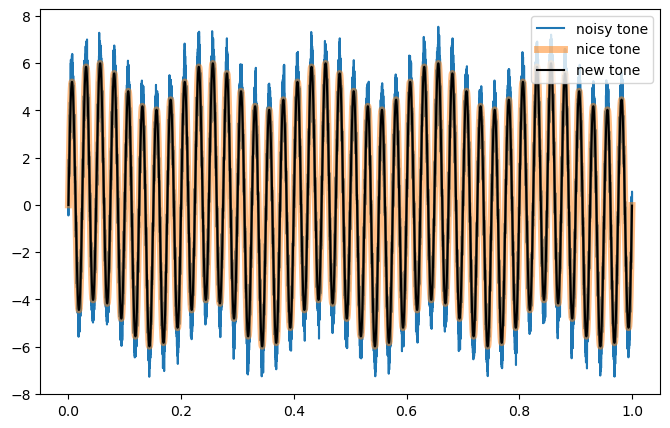

In [4]:
new_sig = irfft(yf)
f, ax = plt.subplots(figsize=(8, 5))

ax.plot(x, noise_tone, label= 'noisy tone')
ax.plot(x, nice_tone, label= 'nice tone', alpha=.5, linewidth=5)
ax.plot(x, new_sig, label= 'new tone', color='black')
plt.legend()

plt.show()

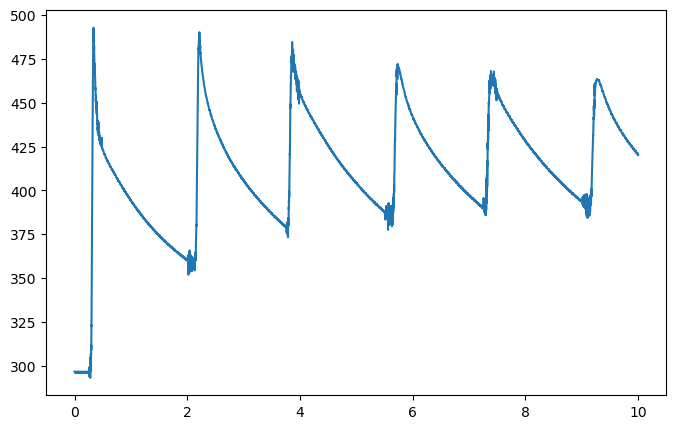

In [18]:
therm_data = pd.read_csv('../data/thermocouples_data.csv')
therm_data = therm_data.groupby('Time').mean().reset_index()
therm_data = therm_data[therm_data['Time']<10]
therm_signal = therm_data.iloc[:,[0,1]]

f, ax = plt.subplots(figsize=(8, 5))
ax.plot(therm_signal.iloc[:,0], therm_signal.iloc[:,1])
plt.show()

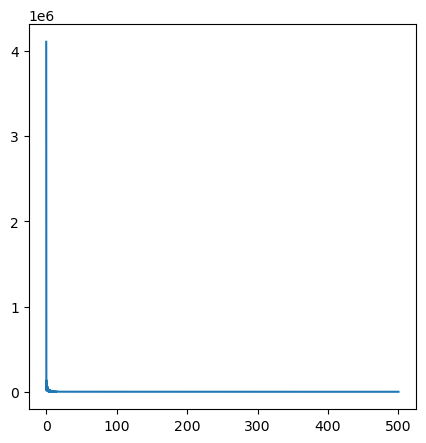

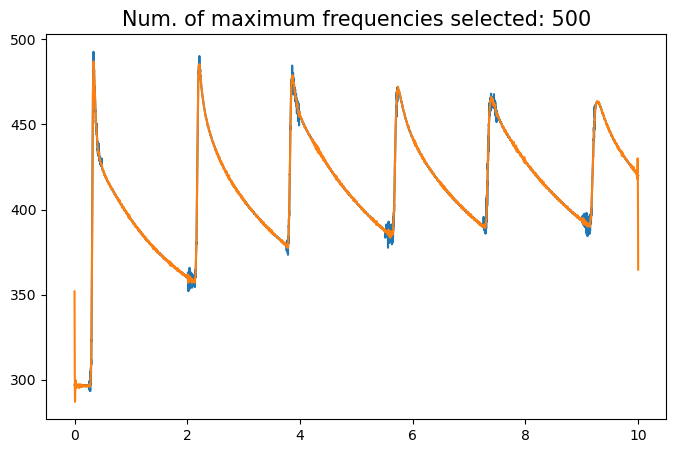

In [29]:
xf = rfftfreq(len(therm_signal.iloc[:,0]), 0.001)

q_of_max_values = 500
yf = rfft(therm_signal.iloc[:,1].values)
max_indexes = np.argpartition(np.abs(yf), -q_of_max_values)[-q_of_max_values:]
indexes = np.ones(len(yf), bool)
indexes[max_indexes] = 0
yf[indexes] = 0

new_sig = irfft(yf)

f, ax = plt.subplots(figsize=(5,5))
ax.plot(xf, np.abs(yf))
plt.show()

f, ax = plt.subplots(figsize=(8,5))
ax.plot(therm_signal.iloc[:,0],therm_signal.iloc[:,1])
ax.plot(therm_signal.iloc[:,0], new_sig)
plt.title(f'Num. of maximum frequencies selected: {q_of_max_values}',fontsize=15)
plt.show()

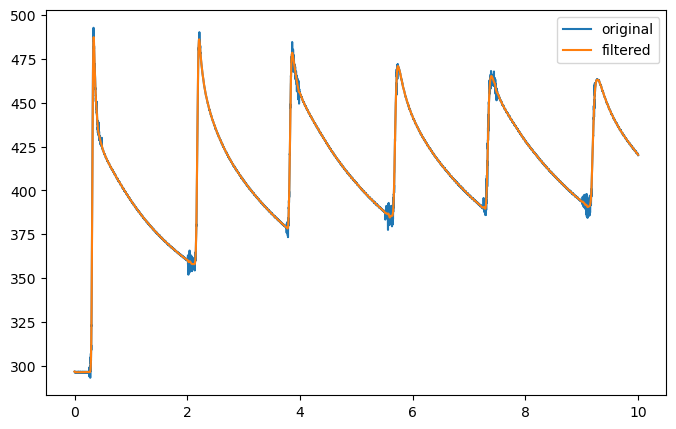

In [30]:
b, a = scipy.signal.butter(3, 0.05)
filtered = scipy.signal.filtfilt(b, a, therm_signal.iloc[:,1])

f, ax = plt.subplots(figsize=(8, 5))
ax.plot(therm_signal.iloc[:,0], therm_signal.iloc[:,1], label = 'original')
ax.plot(therm_signal.iloc[:,0], filtered, label = 'filtered')
plt.legend()
plt.show()